# Exploratory Data Analysis (EDA)

**Exploratory Data Analysis (EDA)** es el proceso inicial en cualquier proyecto de análisis de datos que tiene como objetivo comprender la estructura, el contenido y las características fundamentales del conjunto de datos.

Durante esta etapa, buscamos **responder preguntas clave como**:

- ¿Qué tipo de datos tenemos? ¿Faltan valores?
- ¿Cómo se distribuyen las variables?
- ¿Hay outliers o valores atípicos?
- ¿Existen relaciones interesantes entre variables?

---

### Objetivos principales del EDA

1. **Comprensión general de los datos**  
   Obtener una visión clara del volumen, formato, tipos de datos y posibles errores.

2. **Detección de patrones y anomalías**  
   Identificar tendencias, correlaciones y puntos fuera de lo común (outliers).

3. **Formulación de hipótesis**  
   Plantear suposiciones o ideas que pueden ser validadas posteriormente con análisis más profundos o modelos predictivos.

4. **Preparación de datos para modelado**  
   Guiar la limpieza, transformación y selección de variables relevantes.

---

### Técnicas comunes de EDA

- **Análisis estadístico descriptivo**: media, mediana, desviación estándar, percentiles.
- **Visualizaciones básicas**: histogramas, gráficos de barras, boxplots, scatter plots, heatmaps.
- **Distribución y simetría**: normalidad, sesgo y curtosis.
- **Relaciones entre variables**: análisis bivariado y multivariado.

---

> 💡 *EDA no solo ayuda a limpiar y preparar los datos, sino que también genera intuiciones valiosas que pueden definir el rumbo del análisis.*

In [6]:
# Empecemos importando las librerias y el dataset a utilizar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

wine_quality = pd.read_csv("winequality-red.csv", sep = ",")

In [8]:
# Veamos las primeras 5 filas
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
# Veamos las 5 ultimas filas
wine_quality.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [12]:
# Dimension del dataset
print(wine_quality.shape)

(1599, 12)


¿Qué variables tenemos?
Lo primero que hay que hacer es tratar de identificar el tipo de variables que tenemos y cuáles son los features.

In [14]:
# Nombre de los atributos
wine_quality.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Probablemente si no somos conocedores de vinos, estasa variables tengan poco sentido para nosotros. Recordemos que idealmente, deberíamos tener conocimiento del tema sobre el cual vamos a trabajar (obvio que también podemos conseguir un experto que nos guíe 😉).

Para mayor información sobre el significado de cada variable, podemos acceder a los siguientes links:
* https://wineserver.ucdavis.edu/industry-info/enology/methods-and-techniques/common-chemical-reagents/citric-acid
* https://waterhouse.ucdavis.edu/whats-in-wine
* https://winefolly.com/deep-dive/what-is-residual-sugar-in-wine/
* https://www.mt.com/gb/en/home/supportive_content/ana_chem_applications/titration/AP015.html

In [16]:
# Tipo de dato para cada columna
wine_quality.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

**Completitud en los datos**:
Antes de comenzar cualquier análisis, es bueno revisar los datos para buscar información faltante; y en caso de que la haya, decidir qué es lo que podemos hacer con esos registros faltantes. Con los dataframes de pandas, podemos usar la función info() para encontrar los datos faltantes. 

In [18]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [20]:
# Otra manera también de obtener la misma información, hubiese sido calcular la totalidad de registros por columnas
wine_quality.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [22]:
# Antes de analizar lo principales estadísticos, verifiquemos si tenemos como estructura de dato un dataframe!
type(wine_quality)

pandas.core.frame.DataFrame

# Estadísticas descriptivas

In [24]:
wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [26]:
# Utilicemos la funcion round para visualizar mejor nuestros datos

wine_quality.describe().round()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0
mean,8.0,1.0,0.0,3.0,0.0,16.0,46.0,1.0,3.0,1.0,10.0,6.0
std,2.0,0.0,0.0,1.0,0.0,10.0,33.0,0.0,0.0,0.0,1.0,1.0
min,5.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,3.0,0.0,8.0,3.0
25%,7.0,0.0,0.0,2.0,0.0,7.0,22.0,1.0,3.0,1.0,10.0,5.0
50%,8.0,1.0,0.0,2.0,0.0,14.0,38.0,1.0,3.0,1.0,10.0,6.0
75%,9.0,1.0,0.0,3.0,0.0,21.0,62.0,1.0,3.0,1.0,11.0,6.0
max,16.0,2.0,1.0,16.0,1.0,72.0,289.0,1.0,4.0,2.0,15.0,8.0


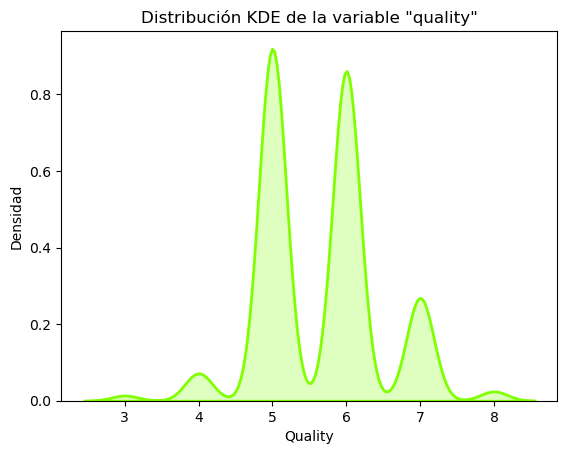

In [60]:
#Histograma

import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(wine_quality['quality'], fill=True, color='chartreuse', linewidth=2)
plt.title('Distribución KDE de la variable "quality"')
plt.xlabel('Quality')
plt.ylabel('Densidad')
plt.show()

Como podemos observar, nuestro conjunto de datos está desbalanceado, con muchos mas 5 y 6 que cualquier otro valor.

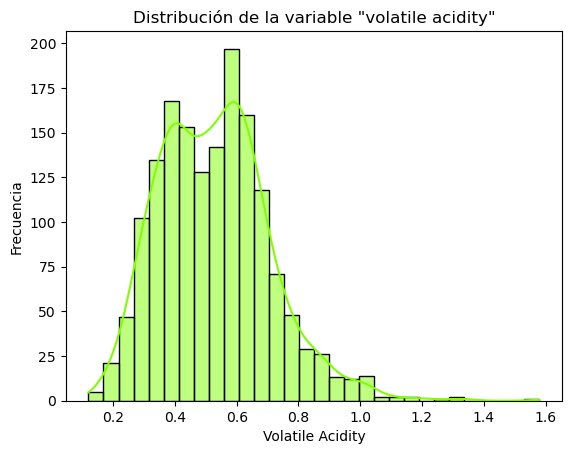

In [58]:
#Veamos otra variable!

sns.histplot(wine_quality["volatile acidity"], kde=True, color='chartreuse', bins=30)
plt.title('Distribución de la variable "volatile acidity"')
plt.xlabel('Volatile Acidity')
plt.ylabel('Frecuencia')
plt.show()

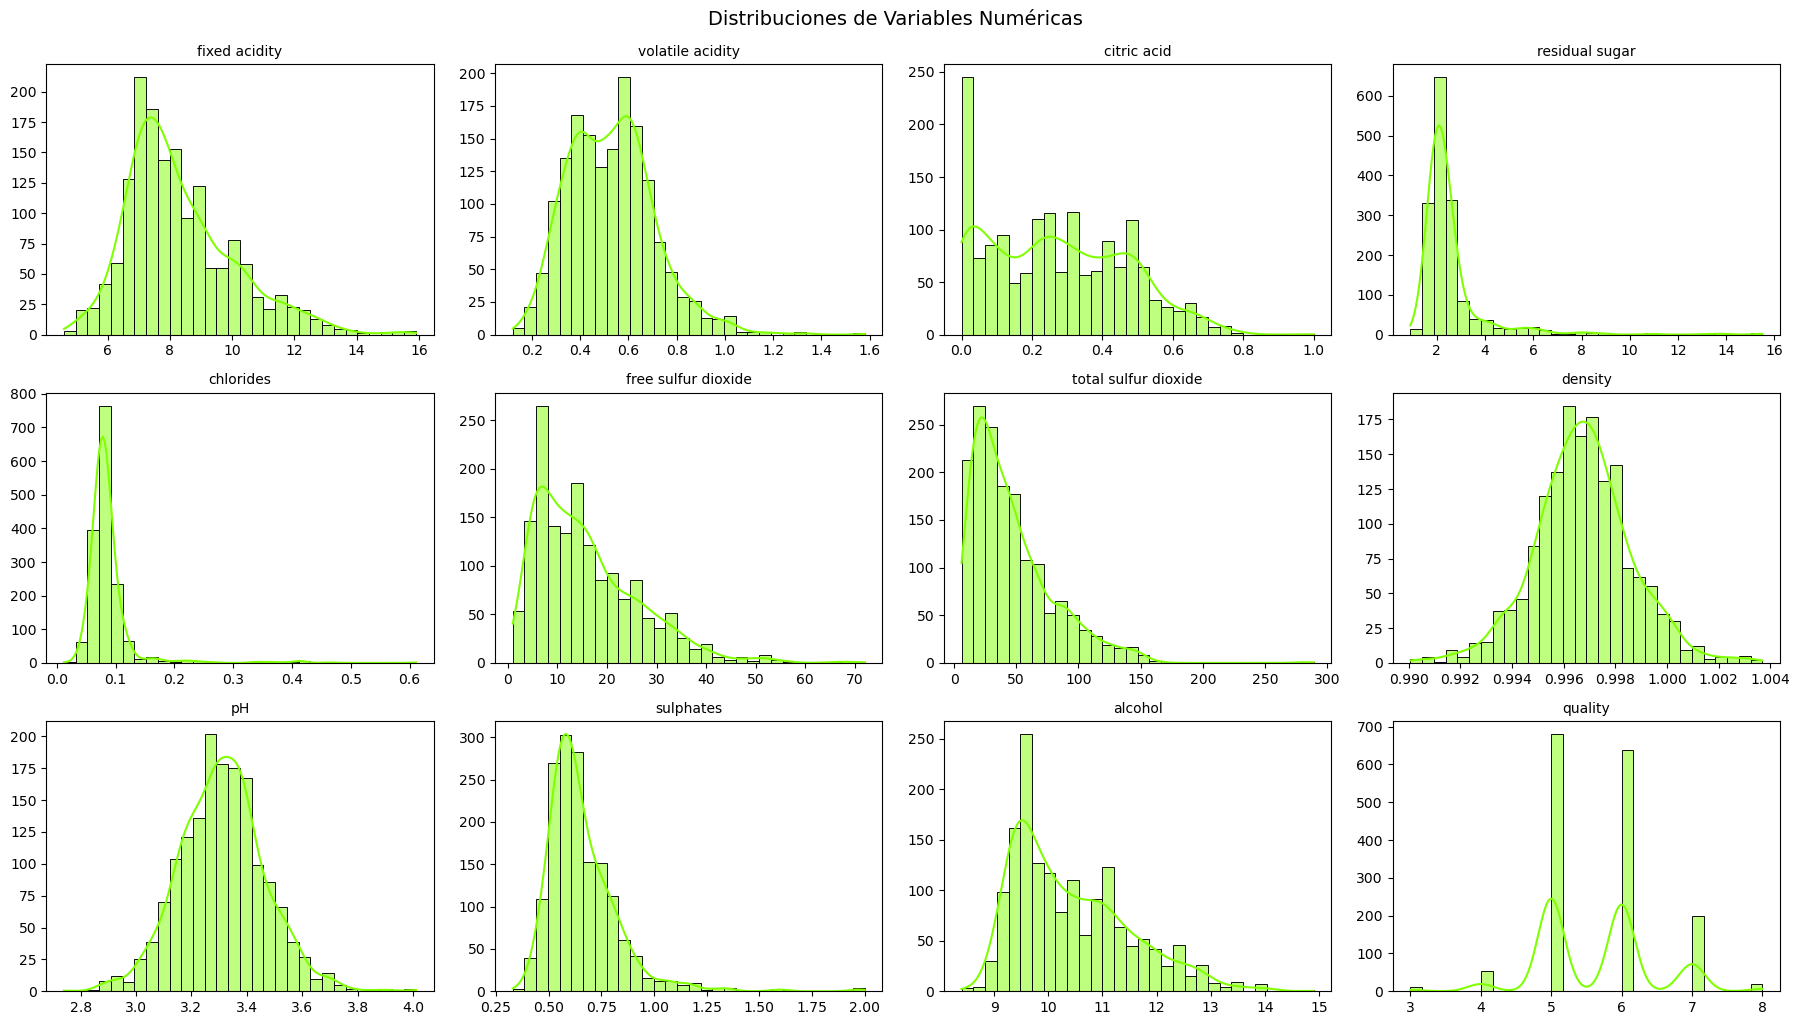

In [56]:
# Variables numéricas que queremos visualizar
variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
             'pH', 'sulphates', 'alcohol', 'quality']

# Configuración de layout
columns = 4
rows = (len(variables) + columns - 1) // columns  # Asegura que cubrimos todas las variables

# Crear figura y ejes
fig, axes = plt.subplots(rows, columns, figsize=(18, 10))
axes = axes.flatten()  # Convierte los ejes 2D en 1D para iterar fácilmente

# Visualización múltiple con histplot + KDE
for idx, variable in enumerate(variables):
    sns.histplot(wine_quality[variable], kde=True, bins=30, color='chartreuse', ax=axes[idx])
    axes[idx].set_title(variable, fontsize=10)
    axes[idx].set_xlabel("")
    axes[idx].set_ylabel("")

# Quitar ejes vacíos si sobran
for i in range(len(variables), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle('Distribuciones de Variables Numéricas', fontsize=14, y=1.02)
plt.show()

De esta gráfica podemos identificar varios aspectos, como ser por ejemplo que que muchas de las variables tienen una distribución asimétrica (fixed acidity, residual sugar, chlorides, por ejemplo), además de que al parecer algunos valores presetan valores extremos (residual sugar, sulphates, total sulfur dioxide).

# Boxplots
Como sabemos los boxplots nos permiten analizar y ver de una manera muy rápida qué variables tienen valores extremos.

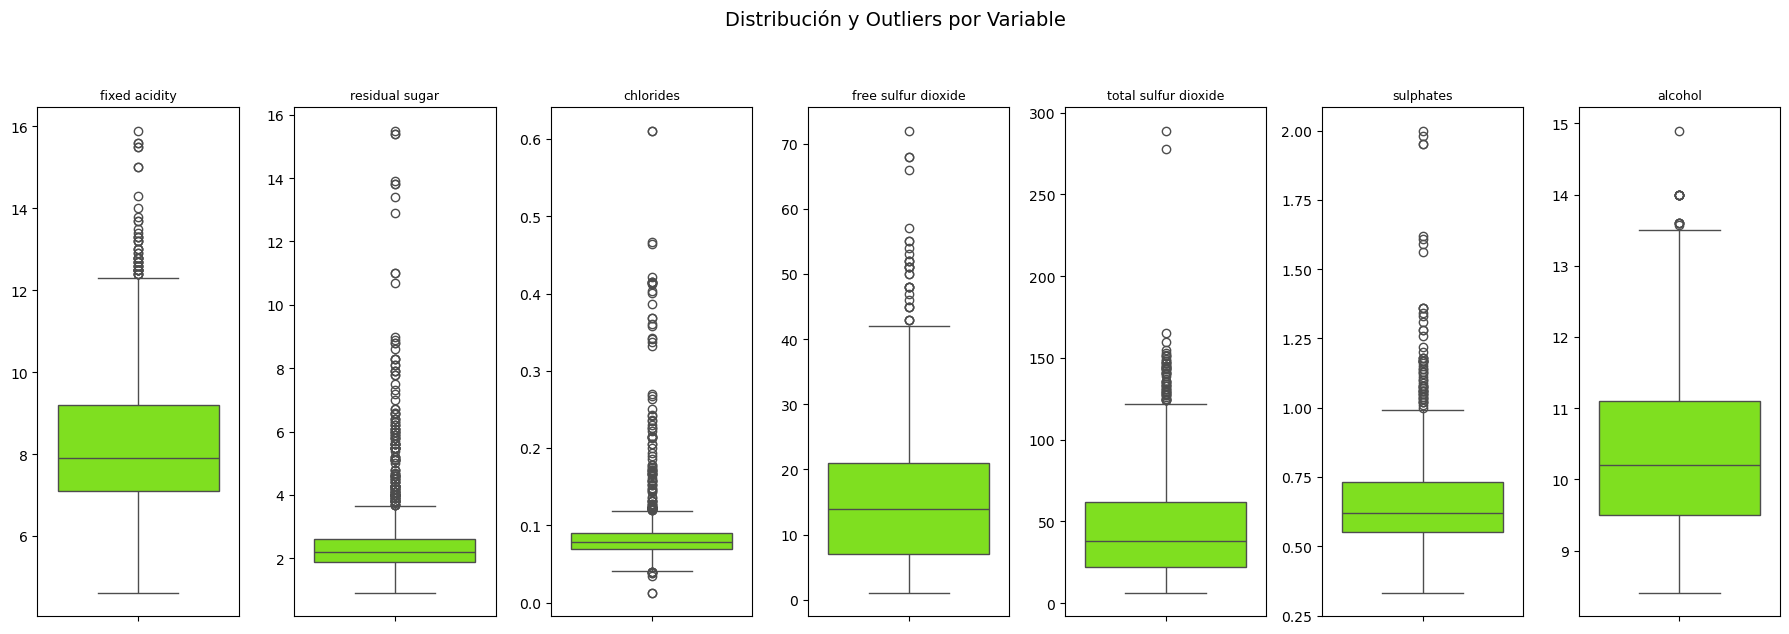

In [64]:
variables = ['fixed acidity', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 
             'total sulfur dioxide', 'sulphates', 'alcohol']

# Layout horizontal de subplots (1 fila, n columnas)
fig, axes = plt.subplots(1, len(variables), figsize=(18, 6), sharey=False)

# Crear un boxplot por variable
for ax, variable in zip(axes, variables):
    sns.boxplot(y=wine_quality[variable], ax=ax, color='chartreuse')
    ax.set_title(variable, fontsize=9)
    ax.set_ylabel("")  # Quitar etiquetas duplicadas
    ax.set_xlabel("")  # Opcional: quitar eje x si no aporta

plt.suptitle('Distribución y Outliers por Variable', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

# Scatterplots
Ahora tratemos de identificar de una manera rápida y visual la correlación entre variables!

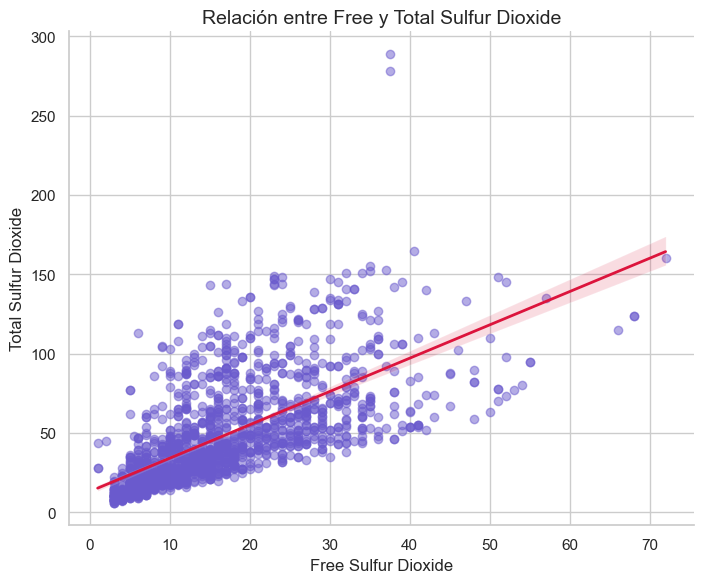

In [66]:
from seaborn import lmplot

sns.set(style="whitegrid")  # Mejora el fondo
sns.lmplot(x='free sulfur dioxide', 
           y='total sulfur dioxide', 
           data=wine_quality, 
           height=6, aspect=1.2,
           scatter_kws={"alpha":0.5, "color":"slateblue"}, 
           line_kws={"color":"crimson", "linewidth":2})

plt.title("Relación entre Free y Total Sulfur Dioxide", fontsize=14)
plt.xlabel("Free Sulfur Dioxide")
plt.ylabel("Total Sulfur Dioxide")
plt.tight_layout()
plt.show()


En la gráfica anterior, si se puede observar una clara relación entre las variables analizadas. También podemos
hacer uso de la Matriz de Correlación si quisieramos ver por ejemplo el coeficiente de **Pearson**

In [76]:
correlation = wine_quality.corr(method="pearson")
correlation.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907


In [78]:
#Resulta más intuitivo ver la matriz de correlación a través de un gráfico - heatmap de seaborn

plt.figure(figsize=(15,15)) #Defino el tamaño del grafico

#Genero el mapa de calor
sns.heatmap(correlation, 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 15},
            cmap= 'dark:salmon_r') 

#Roto los ejes para que queden inclinados
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

KeyError: "'dark:salmon_r' is not a known colormap name"

<Figure size 1500x1500 with 0 Axes>